$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

## Comparing two groups with permutation testing

We return to the Brexit age data from [Analyzing Brexit](https://matthew-brett.github.io/les-pilot/brexit.html).

Here’s the data from the processing we did in [Analyzing Brexit](https://matthew-brett.github.io/les-pilot/brexit.html):

* [remain_leave.csv](https://matthew-brett.github.io/les-pilot/_downloads/remain_leave.csv).

Download the data file from the link above if you haven’t already got it in
your Notebook directory.

In [1]:
import pandas as pd
remain_leave = pd.read_csv('remain_leave.csv')
remainers = remain_leave[remain_leave['brexit'] == 1]
brexiteers = remain_leave[remain_leave['brexit'] == 2]
# Confirm our proportions havent changed
len(brexiteers) / (len(brexiteers) + len(remainers))

0.4114068441064639

For convenience we get our ages scores into lists for each group:

In [2]:
# We make a list from the Pandas column with the "list" function
brexit_ages = list(brexiteers['age'])
remain_ages = list(remainers['age'])
# Check our proportions again
len(brexit_ages) / (len(brexit_ages) + len(remain_ages))

0.4114068441064639

Let’s put up the histograms of these two groups again:

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

(array([ 47.,  49.,  61.,  63.,  63.,  90.,  68.,  66.,  26.,   8.]),
 array([ 18. ,  25.4,  32.8,  40.2,  47.6,  55. ,  62.4,  69.8,  77.2,
         84.6,  92. ]),
 <a list of 10 Patch objects>)

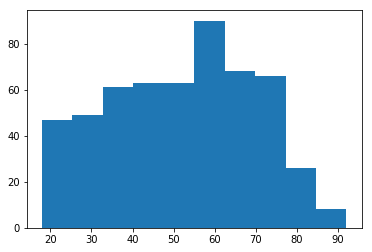

In [5]:
plt.hist(brexit_ages)

(array([ 112.,   90.,  103.,   83.,   89.,   94.,   96.,   65.,   31.,   11.]),
 array([ 18. ,  25.4,  32.8,  40.2,  47.6,  55. ,  62.4,  69.8,  77.2,
         84.6,  92. ]),
 <a list of 10 Patch objects>)

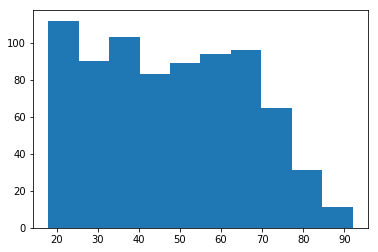

In [6]:
plt.hist(remain_ages)

The remainers look as though they may be a bit younger on average.

Let’s look at the mean age for the two groups.

The *mean* of the values in the list is defined as the sum divided by
the number of items.  Here is the mean age of the `brexiteers`:

In [7]:
sum(brexit_ages) / len(brexit_ages)

51.715341959334566

We can define a function to calculate the mean:

In [8]:
def mean(some_list):
    # Calculates the mean of the values in `some_list`
    return sum(some_list) / len(some_list)

Now we can get the mean with:

In [9]:
mean(brexit_ages)

51.715341959334566

The mean is lower for the Remain group:

In [10]:
mean(remain_ages)

48.015503875968989

The difference between the means is:

In [11]:
observed_difference = mean(brexit_ages) - mean(remain_ages)
observed_difference

3.6998380833655773

We see that the means of the two groups are different - but can we be
confident that this difference did not come about by chance?

What do we mean by chance?  Now we have to define our null hypothesis.

We hypothesize that there is in fact no difference between the ages of the two
groups.  We propose that the difference between the means we see could
reasonably occur if we did the following procedure:

* sample 541 + 774 = 1315 people from this same underlying
  doesn’t-matter-what-you-voted population;

* arbitrarily split this sample into a group of 541 and a group of 774, call
  these `group_A` and `group_B`;

* calculate the mean age for `group_A` and subtract the mean age of
  `group_B`;

Call this procedure - one trial.  To test our null hypothesis, we would like
to repeat this trial many times, recording the difference in means for each
trial. By doing this we could build up a distribution of the kind of
differences we would expect by chance - the sampling distribution.

But - we don’t have any more data - so we don’t have many new groups of 541 +
774 = 1315 to sample.  But it turns out, we can use the data we have to build
the distribution we need.

Let’s start with the null hypothesis - that there is no difference in the ages
of the Leave and Remain groups. If that hypothesis is true, then all the
ages in `brexit_ages` and in `remain_ages` can be considered as
being samples from the same underlying group.

To express this, I’m going to pool all the weights into one big group, like
this:

In [12]:
# The + below appends the second list to the first
all_ages = brexit_ages + remain_ages
len(all_ages)

1315

In this new pooled list, the first 541 ages are from the `brexit_ages` list,
and the rest are from the `remain_ages` list.

Now we have the new pooled list, we can do something similar to taking the new
`group_A` and `group_B` groups we imagined above.  That is, we can
*shuffle* the combined group to a random order, and split this shuffled
combined group into a group of 10 and a group of 13.  We get the difference in
means of these two groups, and store it.  We keep shuffling, to create more
`group_A` and `group_B` groups, and more differences in means. The
generated distribution of the mean differences is the distribution we expect
on the null hypothesis, that there is no real difference between the two
groups.  We can see where `observed_difference` lies in this generated
distribution, and this gives us a measure of whether the
`observed_difference` is likely on the null hypothesis.

Python’s `random.shuffle` function can do the shuffle for us (see:
[Shuffling list element order](https://matthew-brett.github.io/les-pilot/more_on_lists.html#list-shuffle):

In [13]:
import random

Here’s a random shuffle of the combined `brexit_ages` and
`remain_ages` list:

In [14]:
# The first 10 ages before shuffling (all brexit)
all_ages[:10]
random.shuffle(all_ages)
# The first 10 ages of the shuffled list, mixed brexit and remain.
all_ages[:10]

[28, 66, 34, 58, 42, 43, 37, 40, 80, 47]

Now for our permutation test.  We’ve assumed the null hypothesis.  We have
randomly shuffled the combined group.  We’ll call the first 541 values
`group_A` and the last 774 values `group_B`.

After the shuffling, the `group_A` group is a random mix of the
`brexit_ages` and `remain_ages` values, as is the `group_B` group.

Here is a function that takes the combined list and returns the difference in
means:

In [15]:
def difference_in_means(combined_list):
    """ Split suffled combind group into two, return mean difference
    """
    group_A = combined_list[:541]
    group_B = combined_list[541:]
    return mean(group_B) - mean(group_A)

Let’s get the difference in means for these new groups, generated by the
shuffle:

In [16]:
difference_in_means(all_ages)

1.3907803044414848

That difference from the shuffled groups looks a lot less than the difference
we originally found:

In [17]:
observed_difference

3.6998380833655773

One difference is not enough.  We need more shuffled mean differences to see
whether `observed_difference` is really unusual compared to the range of
permuted group differences.  Here we run the shuffle procedure 10000 times, to
get a large range of values:

In [18]:
n_repeats = 10000
shuffled_differences = []  # An empty list to store the differences
for i in range(n_repeats):
    random.shuffle(all_ages)
    new_difference = difference_in_means(all_ages)
    # Collect the new mean by adding to the end of the list
    shuffled_differences.append(new_difference)

This gives us 5000 differences from groups that are compatible with our null
hypothesis.   We can now ask whether `observed_difference` is unusually
large compared to the distribution of these 5000 differences.

In [19]:
%matplotlib inline

In [20]:
# The plotting package
import matplotlib.pyplot as plt

(array([  2.40000000e+01,   1.81000000e+02,   7.17000000e+02,
          2.01500000e+03,   2.97300000e+03,   2.52500000e+03,
          1.19700000e+03,   3.17000000e+02,   5.00000000e+01,
          1.00000000e+00]),
 array([-3.72182101, -2.92823726, -2.1346535 , -1.34106975, -0.54748599,
         0.24609776,  1.03968152,  1.83326527,  2.62684903,  3.42043278,
         4.21401654]),
 <a list of 10 Patch objects>)

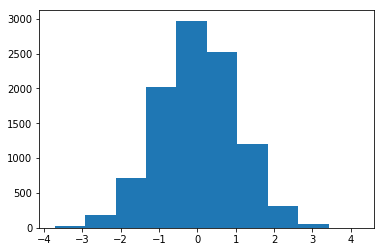

In [21]:
plt.hist(shuffled_differences)

Remember our `observed_difference`?

In [22]:
observed_difference

3.6998380833655773

`observed_difference` looks like it is at the extreme right of the
distribution. But - how far to the right? What proportion of the 5000 null
hypothesis differences are greater than or equal to the observed value?

To test this, we first sort the null hypothesis differences from lowest to
highest:

In [23]:
sorted_differences = sorted(shuffled_differences)

Next we find how many of these null hypothesis differences are greater than or
equal to the `observed_difference`:

In [24]:
# Go through all the differences one by one.
# When we've found a difference greater than or equal to the observed
# one, stop.
index = 0
while index < n_repeats:
    # Check the sorted difference at the current index
    if sorted_differences[index] >= observed_difference:
        # Stop checking, we've found a null hypothesis difference
        # greater than or equal to the observed difference.
        break
    # Otherwise, move on to the next null difference
    index = index + 1

So, the index of the first difference greater than or equal to the observed
difference is:

In [25]:
index

9999

We calculate how many values in `sorted_differences` are greater than or
equal to `observed_difference`:

In [26]:
n_greater_than_equal = n_repeats - index
n_greater_than_equal

1

Therefore, the *proportion* of the null-hypothesis differences that are
greater than or equal to the observed difference is:

In [27]:
prop_greater_equal = n_greater_than_equal / n_repeats
prop_greater_equal

0.0001

This proportion is very small.  Therefore, our observed difference is very
unlikely on the null hypothesis that observations in the two groups are
equivalent. We might be tempted to reject the null hypothesis, and conclude
that the two groups are not equivalent, and therefore, that people who say
they voted Leave really do tend to be older than people who say they voted
Remain.